# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
df = pd.read_csv("./chronic_kidney_disease.csv")
df.head(10)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1
6,70.0,1.010,0.0,0.0,1.0,54.0,24.0,104.00,4.00,12.4,8406.0,4.71,0.0,1
7,76.0,1.015,2.0,4.0,1.0,31.0,1.1,137.53,4.63,12.4,6900.0,5.00,0.0,1
8,100.0,1.015,3.0,0.0,1.0,60.0,1.9,137.53,4.63,10.8,9600.0,4.00,1.0,1
9,90.0,1.020,2.0,0.0,0.0,107.0,7.2,114.00,3.70,9.5,12100.0,3.70,1.0,1


# Dataset info

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


# Null check

In [5]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

# Charts

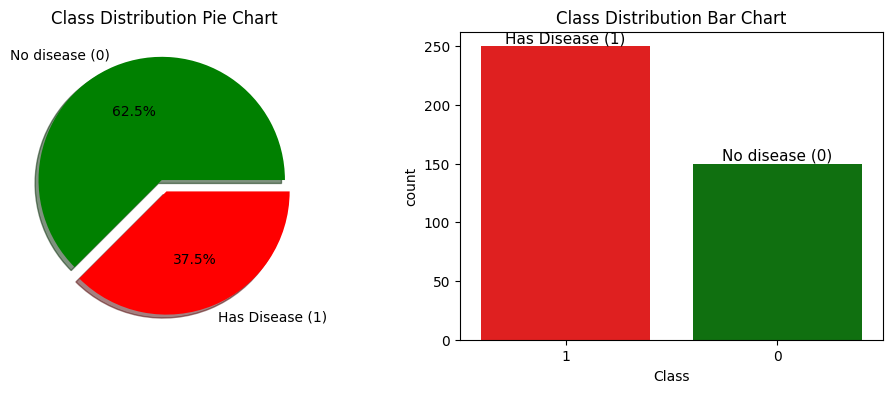

In [131]:
class_colors = ['green', 'red']  
class_order = ["No disease (0)", "Has Disease (1)"]  

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#  pie chart for Class distribution
df['Class'].value_counts().plot(kind="pie", 
                                labels=class_order, 
                                colors=class_colors, 
                                explode=[0.05, 0.05], 
                                autopct='%1.1f%%', 
                                ax=ax[0], 
                                shadow=True)
ax[0].set_title("Class Distribution Pie Chart")
ax[0].set_ylabel('')



 #  bar chart for Class distribution
new_labels = ["No disease (0)", "Has Disease (1)"]

count = sns.countplot(x="Class", data=df, ax=ax[1], order=[1, 0], hue="Class", legend=False, palette=class_colors)


for i, bar in enumerate(count.patches):
    count.annotate(new_labels[i], 
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 6),
                   textcoords='offset points')

# title and show the plot
ax[1].set_title("Class Distribution Bar Chart")
plt.show()



# Imports

In [3]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Split Dataset

In [8]:
x = df.drop("Class", axis=1)
y = df.Class


x_train, x_test, y_train, y_test = split(x, y, test_size=0.20, random_state=1)



# # Processed Dataset
# X_proc = data.drop("RiskLevel", axis=1)
# y_proc = data.RiskLevel
# x_train_proc, x_test_proc, y_train_proc, y_test_proc = split(X_proc, y_proc, test_size=0.20, random_state=1)

print(f"Original data has total {x_train.shape[0]+x_test.shape[0]} datas, {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
# print(f"Processes data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has total 400 datas, 320 train data and 80 test data



# Decision tree model

In [18]:
rf = DecisionTreeClassifier(random_state=50)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")


Test Accuracy: 95.0%


# Random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=50)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")


Test Accuracy: 100.0%


# SVM

In [17]:

rf = SVC(random_state=50)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Original Dataset Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Original Dataset Accuracy: 58.75%


# Report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.96      0.96      0.96        47

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



# Confusion matrix

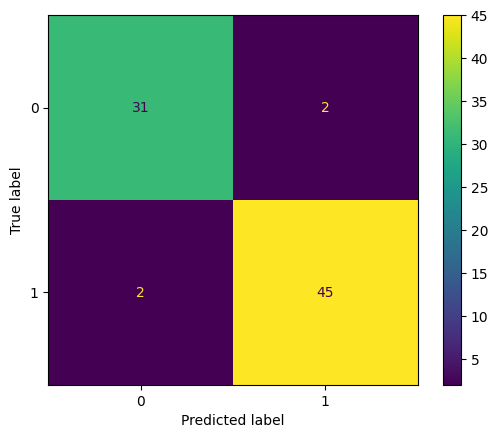

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

# outlier

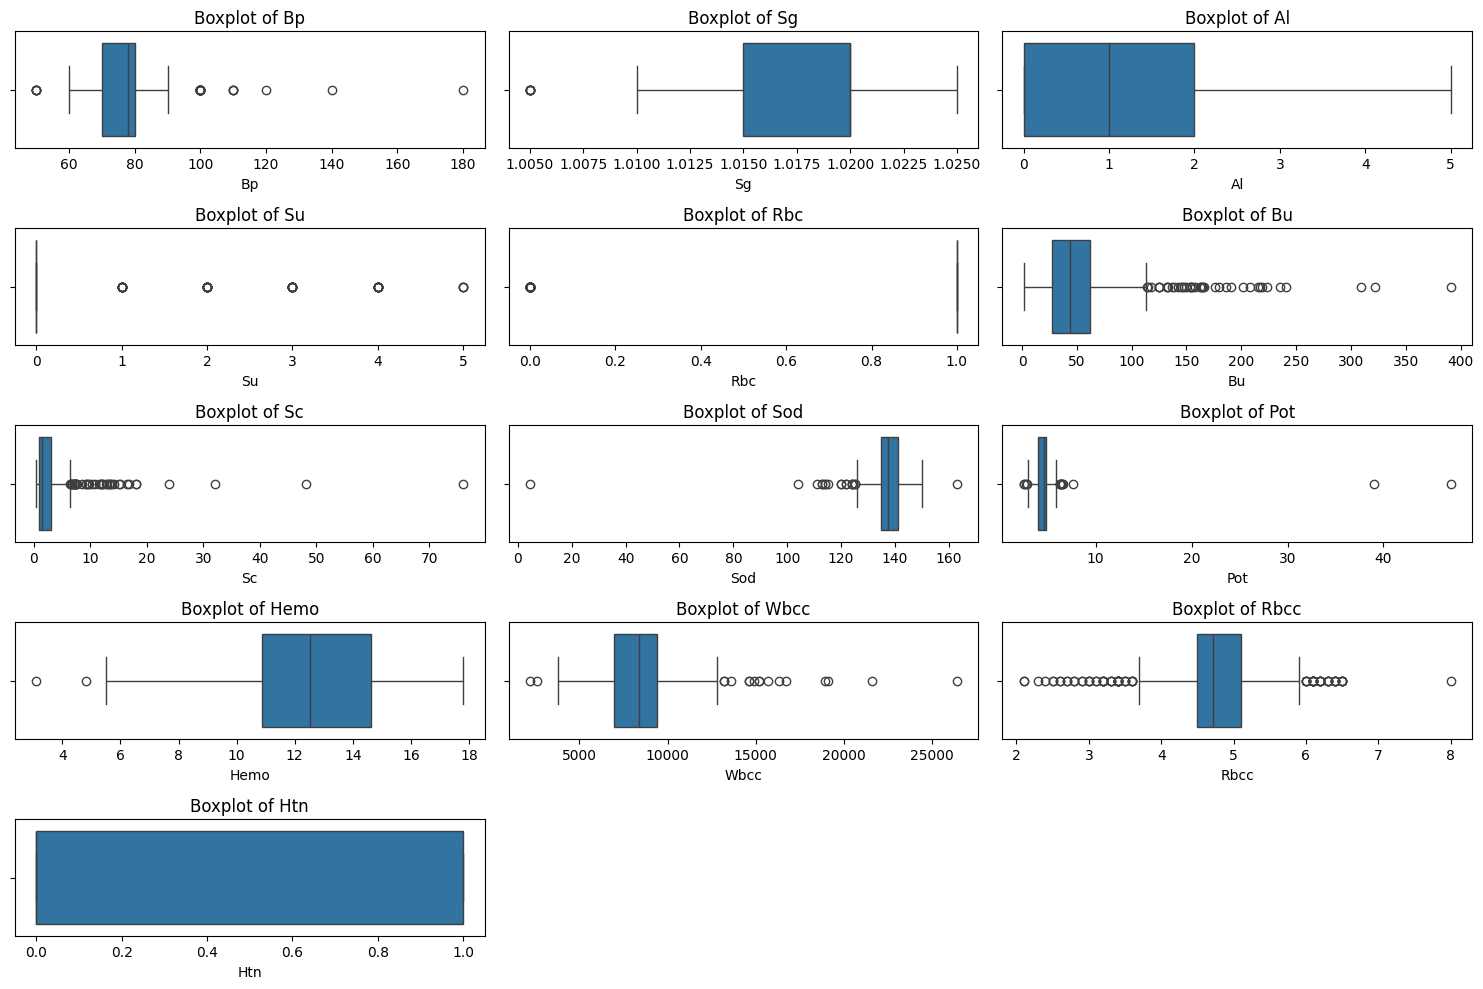

In [25]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(x.columns, 1):
    plt.subplot(len(x.columns) // 3 + 1, 3, i)  # Create subplots dynamically
    sns.boxplot(x=x[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# outlier col

In [29]:
# import numpy as np
# import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outlier_columns = []
    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers in the column
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns

# Detect which columns in X have outliers
columns_with_outliers = detect_outliers(x)

print("Columns with outliers:", columns_with_outliers)



Columns with outliers: ['Bp', 'Sg', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']


# outliers count

In [31]:
# import pandas as pd

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(x)

# Display the columns with the most outliers
print(outlier_counts_df)

   Column  Outlier Count
11   Rbcc             75
3      Su             61
4     Rbc             47
6      Sc             44
5      Bu             41
0      Bp             36
7     Sod             18
10   Wbcc             17
8     Pot             14
1      Sg              7
9    Hemo              2
2      Al              0
12    Htn              0
